# Week 11 - Introduction to Modeling, part 2

# 1. Lesson - No lesson this week

# 2. Weekly graph question

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

The book names one of Vonnegut's rules as "keep it simple" and another as "have the guts to cut."  Here is some data from the previous week's lesson.  If you had to cut one of the two plots below, which would it be?  Which seems more interesting or important?  Explain.  (Should "amount of training data used" or "number of estimators" be on the x-axis.)

In [2]:
np.random.seed(0)
num_points = 10000
feature_1a = np.random.random(size = num_points) * 3
feature_2a = np.random.random(size = num_points) * 3
feature_3a = np.random.random(size = num_points) * 3
train_target = (feature_1a - 2 * feature_2a) * feature_3a + np.random.normal(size = num_points)
feature_1b = np.random.random(size = num_points) * 3
feature_2b = np.random.random(size = num_points) * 3
feature_3b = np.random.random(size = num_points) * 3
test_target = (feature_1b - 2 * feature_2b) * feature_3b + np.random.normal(size = num_points)
train_df = pd.DataFrame({"f1": feature_1a, "f2": feature_2a, "f3": feature_3a})
test_df = pd.DataFrame({"f1": feature_1b, "f2": feature_2b, "f3": feature_3b})
rf = RandomForestRegressor()
rf.fit(train_df.values, train_target)

RandomForestRegressor()

In [3]:
rmse_lst = list()
rf = RandomForestRegressor()
for x in range(round(num_points / 20), num_points, round(num_points / 20)):
    rf.fit(train_df.values[0:x,:], train_target[0:x])
    rmse_lst.append(root_mean_squared_error(rf.predict(test_df.values), test_target))

import matplotlib.pyplot as plt

Text(0, 0.5, 'Loss function')

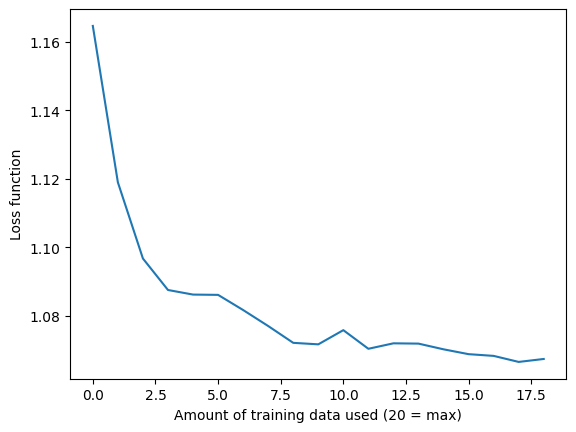

In [4]:
plt.plot(rmse_lst)
plt.xlabel("Amount of training data used (20 = max)")
plt.ylabel("Loss function")

In [ ]:
num_trees_lst = list()
for n_estimators in range(1, 100, 3):
    rf = RandomForestRegressor(n_estimators = n_estimators)
    rf.fit(train_df.values, train_target)
    num_trees_lst.append(root_mean_squared_error(rf.predict(test_df.values), test_target))

Text(0, 0.5, 'Loss function')

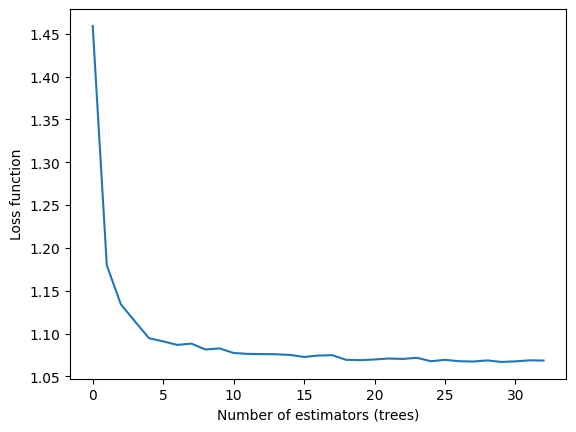

In [ ]:
plt.plot(num_trees_lst)
plt.xlabel("Number of estimators (trees)")
plt.ylabel("Loss function")

# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

Here are some types of analysis you can do:

* Implement a random forest model.
* Perform cross-validation.
* Tune hyperparameters.
* Evaluate a performance metric.

If you like, you can try other types of models, too (beyond linear regression and random forest) although you will have many opportunities to do that next semester.

# 4. Storytelling With Data plot

Reproduce any graph of your choice in chapter seven (p. 165-185) of the Storytelling With Data book as best you can. You do not have to get the exact data values right, just the overall look and feel.

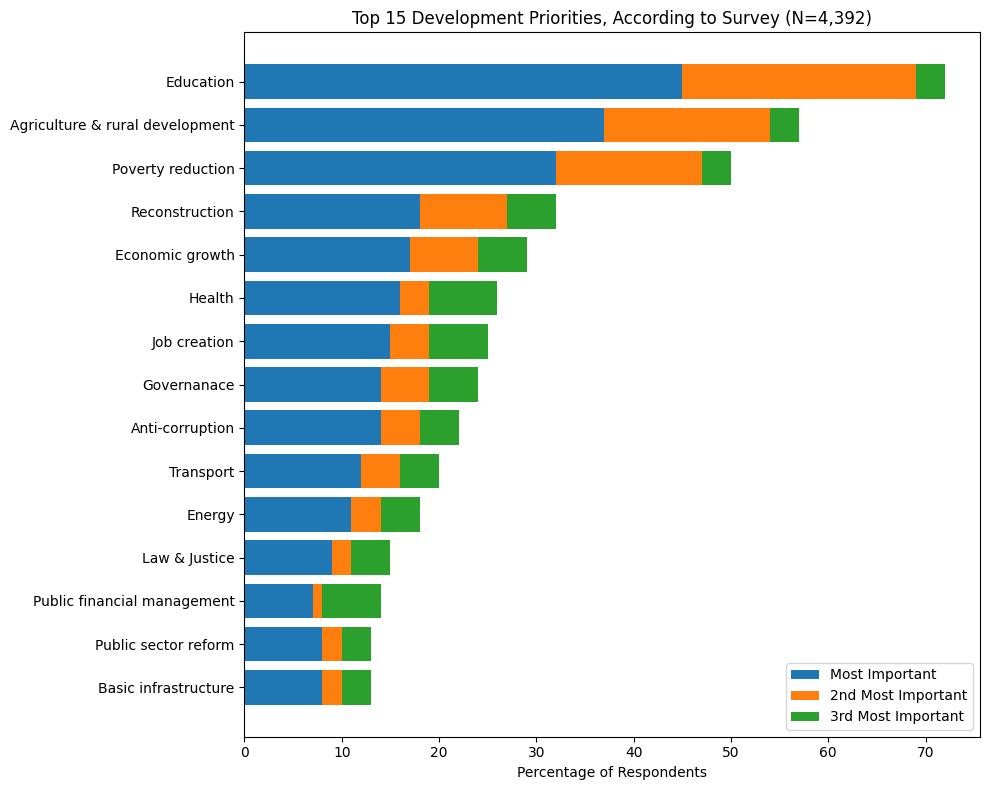

In [ ]:
import matplotlib.pyplot as plt

# Data
priorities = [
    "Education", "Agriculture & rural development", "Poverty reduction", "Reconstruction",
    "Economic growth", "Health", "Job creation", "Governanace", "Anti-corruption",
    "Transport", "Energy", "Law & Justice", "Basic infrastructure",
    "Public sector reform", "Public financial management"
]

most_important = [45, 37, 32, 18, 17, 16, 15, 14, 14, 12, 11, 9, 8, 8, 7]
second_most = [24, 17, 15, 9, 7, 3, 4, 5, 4, 4, 3, 2, 2, 2, 1]
third_most = [3, 3, 3, 5, 5, 7, 6, 5, 4, 4, 4, 4, 3, 3, 6]

# Sorting by total (for better visual impact)
total = [m + s + t for m, s, t in zip(most_important, second_most, third_most)]
sorted_data = sorted(zip(total, priorities, most_important, second_most, third_most), reverse=True)
total, priorities, most_important, second_most, third_most = zip(*sorted_data)

# Plotting
fig, ax = plt.subplots(figsize=(10, 8))
bar1 = ax.barh(priorities, most_important, color="#1f77b4", label="Most Important")
bar2 = ax.barh(priorities, second_most, left=most_important, color="#ff7f0e", label="2nd Most Important")
bar3 = ax.barh(priorities, third_most,
               left=[i + j for i, j in zip(most_important, second_most)],
               color="#2ca02c", label="3rd Most Important")

# Formatting
ax.invert_yaxis()
ax.set_xlabel("Percentage of Respondents")
ax.set_title("Top 15 Development Priorities, According to Survey (N=4,392)")
ax.legend()

plt.tight_layout()
plt.show()
